In [24]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [5]:
os.chdir('/home/sarahwie/Documents/pubmed-nlp-research/')

In [3]:
tree = ET.parse('testXMLwrite.xml')
root = tree.getroot()

In [2]:
#using this file for our example
xml_file = ET.parse('/home/sarahwie/Documents/zip/subset/zip/medline16n0189.xml')
root = xml_file.getroot()

Note: some strings (in foreign languages/with accent marks) are encoded as unicode (see below). 
But this most likely wont be the case with MUSC's journals.

In [4]:
record = root.getchildren()[0]
title = record.find('Article').find('Journal').find('Title').text
print type(title)
print title

<type 'unicode'>
La semaine des hôpitaux : organe fondé par l'Association d'enseignement médical des hôpitaux de Paris


/home/sarahwie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()


In [98]:
titles = []
for record in root.findall('MedlineCitation'):
    title = record.find('Article').find('Journal').find('Title').text
    #get a list of titles
    titles.append(title)
print len(titles)

30000


In [99]:
#Another try (bar chart this time). Need a diff. layout dataframe than for the histograms.
from collections import Counter

data = Counter(titles).most_common()[0:10]
print data

[('Lancet (London, England)', 525), ('The Journal of biological chemistry', 361), ('British medical journal', 345), ('The New England journal of medicine', 275), ('Methods in enzymology', 261), ('Biochimica et biophysica acta', 246), ('Journal of immunology (Baltimore, Md. : 1950)', 230), ('Proceedings of the National Academy of Sciences of the United States of America', 213), ('JAMA', 209), ('Journal of bacteriology', 202)]


In [100]:
df = pd.DataFrame(data)
df

,0,1
0,"Lancet (London, England)",525
1,The Journal of biological chemistry,361
2,British medical journal,345
3,The New England journal of medicine,275
4,Methods in enzymology,261
5,Biochimica et biophysica acta,246
6,"Journal of immunology (Baltimore, Md. : 1950)",230
7,Proceedings of the National Academy of Science...,213
8,JAMA,209
9,Journal of bacteriology,202


In [101]:
x = df.index.tolist()
print x

labels = df.loc[:,0].tolist()
print labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lancet (London, England)', 'The Journal of biological chemistry', 'British medical journal', 'The New England journal of medicine', 'Methods in enzymology', 'Biochimica et biophysica acta', 'Journal of immunology (Baltimore, Md. : 1950)', 'Proceedings of the National Academy of Sciences of the United States of America', 'JAMA', 'Journal of bacteriology']


([<matplotlib.axis.XTick at 0x7f061e229850>,
 <a list of 10 Text xticklabel objects>)

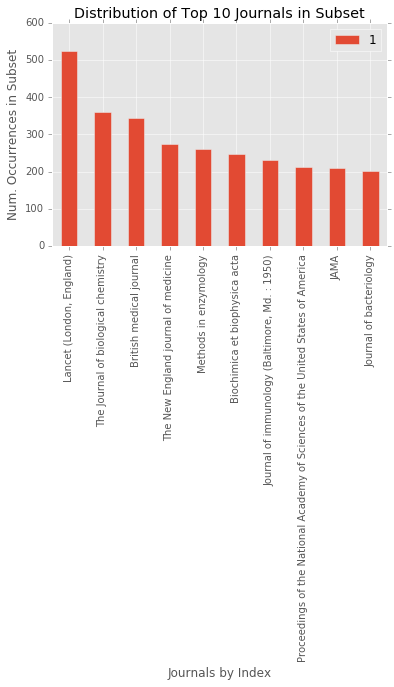

In [97]:
#make histogram

%matplotlib inline

pltjournals = df.plot.bar()
#xticks(arange(len(title_id)),title_id)
plt.title('Distribution of Top 10 Journals in Subset')
plt.xlabel("Journals by Index")
plt.ylabel("Num. Occurrences in Subset")
plt.xticks(x, labels, rotation='vertical')
#plt.axis([0.0,1.0, 0.0, 4.0])